# DNA methylation in Mytilus chilensis

Epigenetic mechanisms of local adaptation

Cristian Gallardo [](https://orcid.org/0000-0000-0000-0000) (University of Concepcion)  
Valentina Venezuala [](https://orcid.org/0000-0000-0000-0001) (University of Concepcion)  
Steven Roberts [](https://orcid.org/0000-0000-0000-0002) (University of Washington)  
August 12, 2025

We investigate genome-wide DNA methylation patterns in Mytilus chilensis from two contrasting seedbeds—Cochamó and Yaldad—using whole-genome bisulfite sequencing and high-throughput bioinformatics. We identify differentially methylated loci (DMLs) and genes, revealing a shift toward hypomethylation among DML-associated genes. Functional annotation shows that DMLs are concentrated in genes mediating metabolism, development, and cellular organization, with many targets localized to cytoplasmic and nuclear compartments. DML-associated genes are dispersed across diverse KEGG pathways and contain a wide array of regulatory and interaction-rich Pfam domains. These findings suggest a system-wide epigenetic response, with potential consequences for metabolic control and developmental programming, and provide new insights into how environmental and anthropogenic forces shape genomic and epigenomic variation in a key aquaculture species.

# Introduction

Understanding how marine species respond to environmental heterogeneity is critical for conserving locally adapted populations and sustaining aquaculture practices in the face of global change. The Chilean blue mussel, Mytilus chilensis, a key endemic species in southern Chile, supports one of the world’s largest mussel aquaculture industries. However, the biological foundation of population-level adaptation in this species remains underexplored. Emerging evidence suggests that both genetic and epigenetic mechanisms—particularly DNA methylation—may contribute to phenotypic plasticity and local adaptation in marine invertebrates.

Previous studies have revealed extensive transcriptomic and mitochondrial differences between M. chilensis populations from ecologically distinct seedbeds, such as Cochamó (41°S) and Yaldad (43°S), in the inner sea of Chiloé Island. These differences include differential expression of genes involved in immunity, metabolism, and cellular stress responses, as well as tissue-specific shifts in mitochondrial gene expression linked to local environmental pressures, including aquaculture practices and variable oxygenation levels ([Yévenes et al. 2021](#ref-yevenes2021adaptive), [2022](#ref-yevenes2022adaptive)). Experimental evidence from reciprocal transplants shows population-specific transcriptional responses and reduced growth performance upon translocation, highlighting functional divergence between seedbeds despite high larval connectivity ([Yévenes, Gajardo, and Gallardo-Escárate 2025](#ref-yevenes2025decoding)).

In addition to gene expression differences, recent work has uncovered epigenetic signatures that may contribute to adaptive divergence. Long non-coding RNAs (lncRNAs) were found to be differentially expressed between Cochamó and Yaldad populations, with associated changes in immune and metabolic gene networks ([Yévenes, Gallardo-Escárate, and Gajardo 2023](#ref-yevenes2023epigenetic)). These findings underscore the potential for environmentally responsive regulatory elements—including DNA methylation—to mediate local adaptation.

Yet, the role of DNA methylation in shaping population-specific responses in M. chilensis remains unexplored. DNA methylation, a heritable and reversible epigenetic modification, can influence gene expression and phenotypic traits without altering the underlying DNA sequence. In bivalves, DNA methylation is known to affect developmental and immune processes and may be responsive to environmental stressors such as hypoxia, toxins, and acidification—conditions that vary across the Chilean inner sea and have been shown to modulate gene expression and microbiota composition in M. chilensis ([Montúfar-Romero et al. 2024](#ref-montufar2024hypoxia), [2025](#ref-montufar2025microbiota); [Castillo et al. 2017](#ref-castillo2017ocean)).

In this study, we investigate genome-wide DNA methylation patterns in Mytilus chilensis from two contrasting seedbeds—Cochamó and Yaldad—with the aim of identifying differentially methylated regions (DMRs) that may underlie local adaptation. By integrating this epigenetic information with known patterns of gene expression and environmental context, we seek to illuminate the molecular basis of ecological divergence and contribute new insights into how environmental and anthropogenic forces shape genomic and epigenomic variation in a key aquaculture species.

# Methods

To investigate DNA methylation differences between populations of Mytilus chilensis from Cochamó and Yaldad, whole-genome bisulfite sequencing (WGBS) was performed and analyzed using a reproducible, high-throughput bioinformatics workflow. DNA was extracted from gill tissue of adult individuals and subjected to bisulfite treatment and library preparation. Libraries were sequenced on an Illumina NovaSeq 6000 platform, generating 150 bp paired-end reads, with each sample yielding approximately 120–160 million read pairs, providing \>30× average coverage across the 1.93 Gb M. chilensis genome.

## Read Processing and Alignment

Raw sequencing reads were processed using the nf-core/methylseq pipeline (version 2.5), implemented through Nextflow (version 23.04.1). Reads were aligned to the M. chilensis reference genome (MchilensisGenomeV1.fa), a chromosome-level assembly comprising 14 scaffolds (Gallardo-Escárate et al. 2023), using Bismark (version 0.24.1) with the Bowtie2 aligner (version 2.5.1). Quality trimming was applied to reverse reads by hard-clipping the final 10 bases (–clip_r2 10) to mitigate low-quality base calls at the 3′ end. Methylation calls were extracted using the Bismark methylation extractor and aggregated by cytosine context. Pipeline execution was configured via a custom .config file to specify HPC resources and run with –resume, –with-trace, –with-report, and –with-timeline flags for reproducibility and tracking. Output files were stored in a structured directory and included per-base CpG methylation calls, quality control metrics, and coverage files.

## Methylation Data Processing and Filtering

Downstream analysis was performed in R (version 4.3.1) using the methylKit package (version 1.10.0). Due to compatibility issues with newer versions of supporting libraries, data.table was pinned to version 1.14.10. Methylation coverage files were imported using methRead() with the pipeline = “bismarkCoverage” parameter and CpG context specified. Six samples—three each from Cochamó (LCo_BSr1–3) and Yaldad (LYa_BSr1–3)—were analyzed. Samples were assigned to treatment groups with Cochamó designated as the control (treatment = 0) and Yaldad as the treatment group (treatment = 1).

To ensure data quality, CpG sites were filtered to retain only those with a minimum read coverage of 10 in all samples, excluding those in the top 2% of coverage values to reduce PCR bias. Sites were then unified across samples using unite() with min.per.group = 3 and destrand = FALSE to retain strand-specific methylation information.

### Exploratory and Differential Methylation Analyses

Global methylation patterns were assessed using hierarchical clustering (Ward’s method on correlation distance) and principal component analysis (PCA) to evaluate sample similarity. Population-level differences in DNA methylation were then tested using methylKit’s logistic regression model, incorporating a multinomial overdispersion correction (overdispersion = “MN”) to account for biological variability. Statistical testing was performed using the Chi-squared test (test = “Chisq”), and q-values were adjusted for multiple testing using the SLIM method (adjust = “SLIM”).

Differentially methylated loci (DMLs) were defined as CpG sites with an absolute methylation difference ≥25% and FDR-adjusted q-value ≤ 0.05. Separate sets of DMLs were extracted to identify hypomethylated (lower in Yaldad) and hypermethylated (higher in Yaldad) loci. Results were saved as tab-delimited text files for downstream annotation and visualization.

# Results

Bisulfite sequencing across six libraries yielded approximately 99.8 million reads per sample. Alignment to the reference genome was successful for 60.5–61.4% of reads, with 22–24% unaligned and 15–16% aligning ambiguously. After removal of duplicate reads (2.2–3.5 million per sample), 57.0–58.8 million uniquely aligned reads remained for methylation analysis.

Genome-wide cytosine methylation was assessed in CpG, CHG, and CHH contexts. Across samples, ~2.1–2.2 billion cytosines were examined. CpG methylation was the most prominent, with an average of ~36 million methylated CpGs and ~205 million unmethylated CpGs per sample, corresponding to a methylation rate of approximately 15%. In contrast, CHG and CHH methylation was much lower, with methylation levels below 1% in both contexts. These patterns are consistent with expectations for invertebrate methylomes, where methylation is primarily restricted to CpG sites.

In total, 1117 differentially methylated loci (DMLs) were identified (see Methods and Supplementary Data). These DMLs were distributed across all chromosomes and classified as either hypomethylated or hypermethylated based on methylation difference.


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

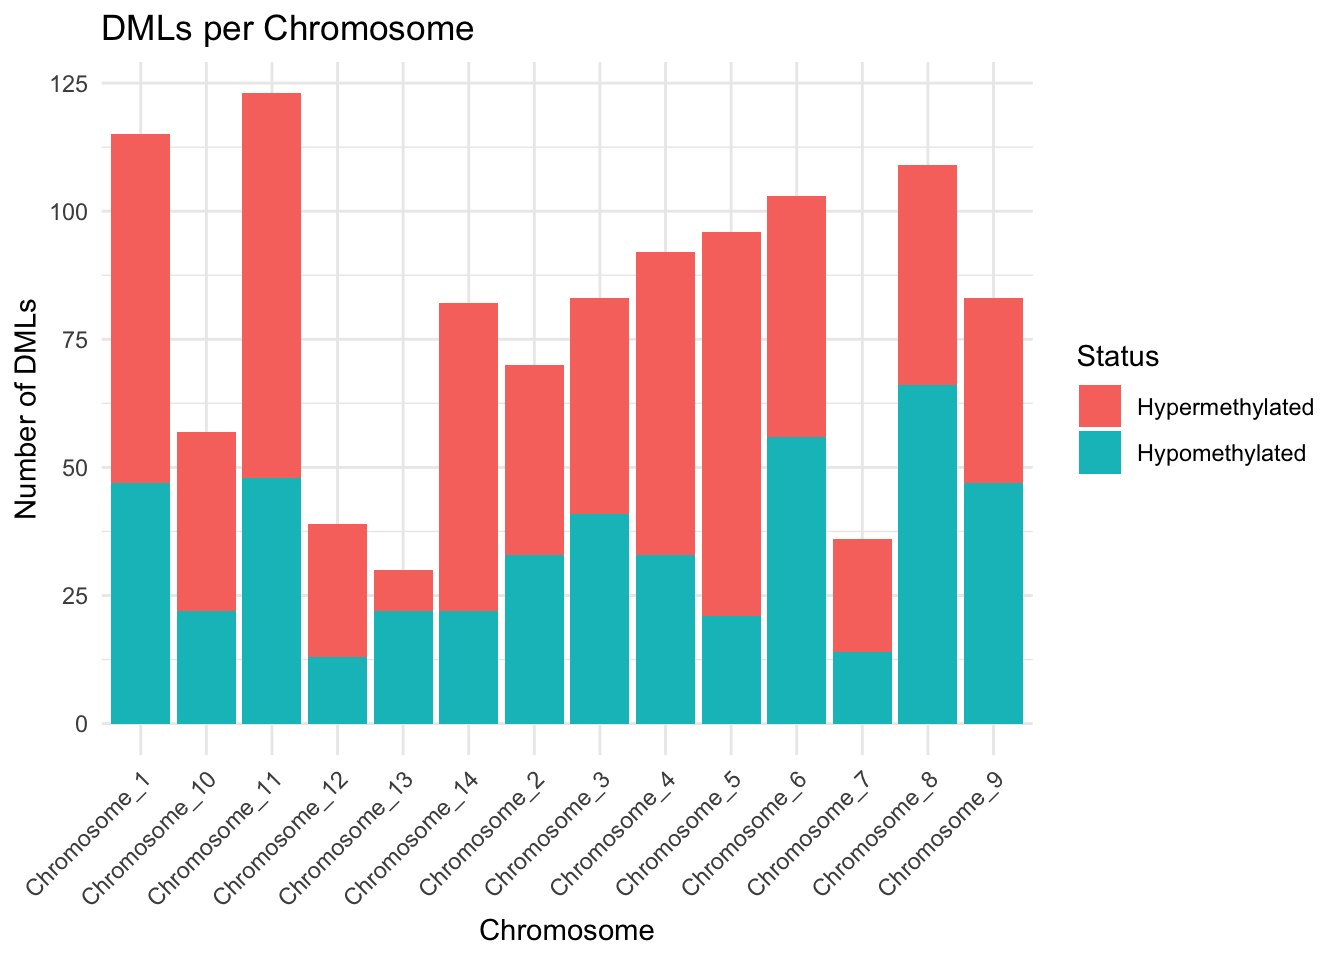

In [ ]:
library(ggplot2)
library(readr)
library(dplyr)

## Location

<figure>
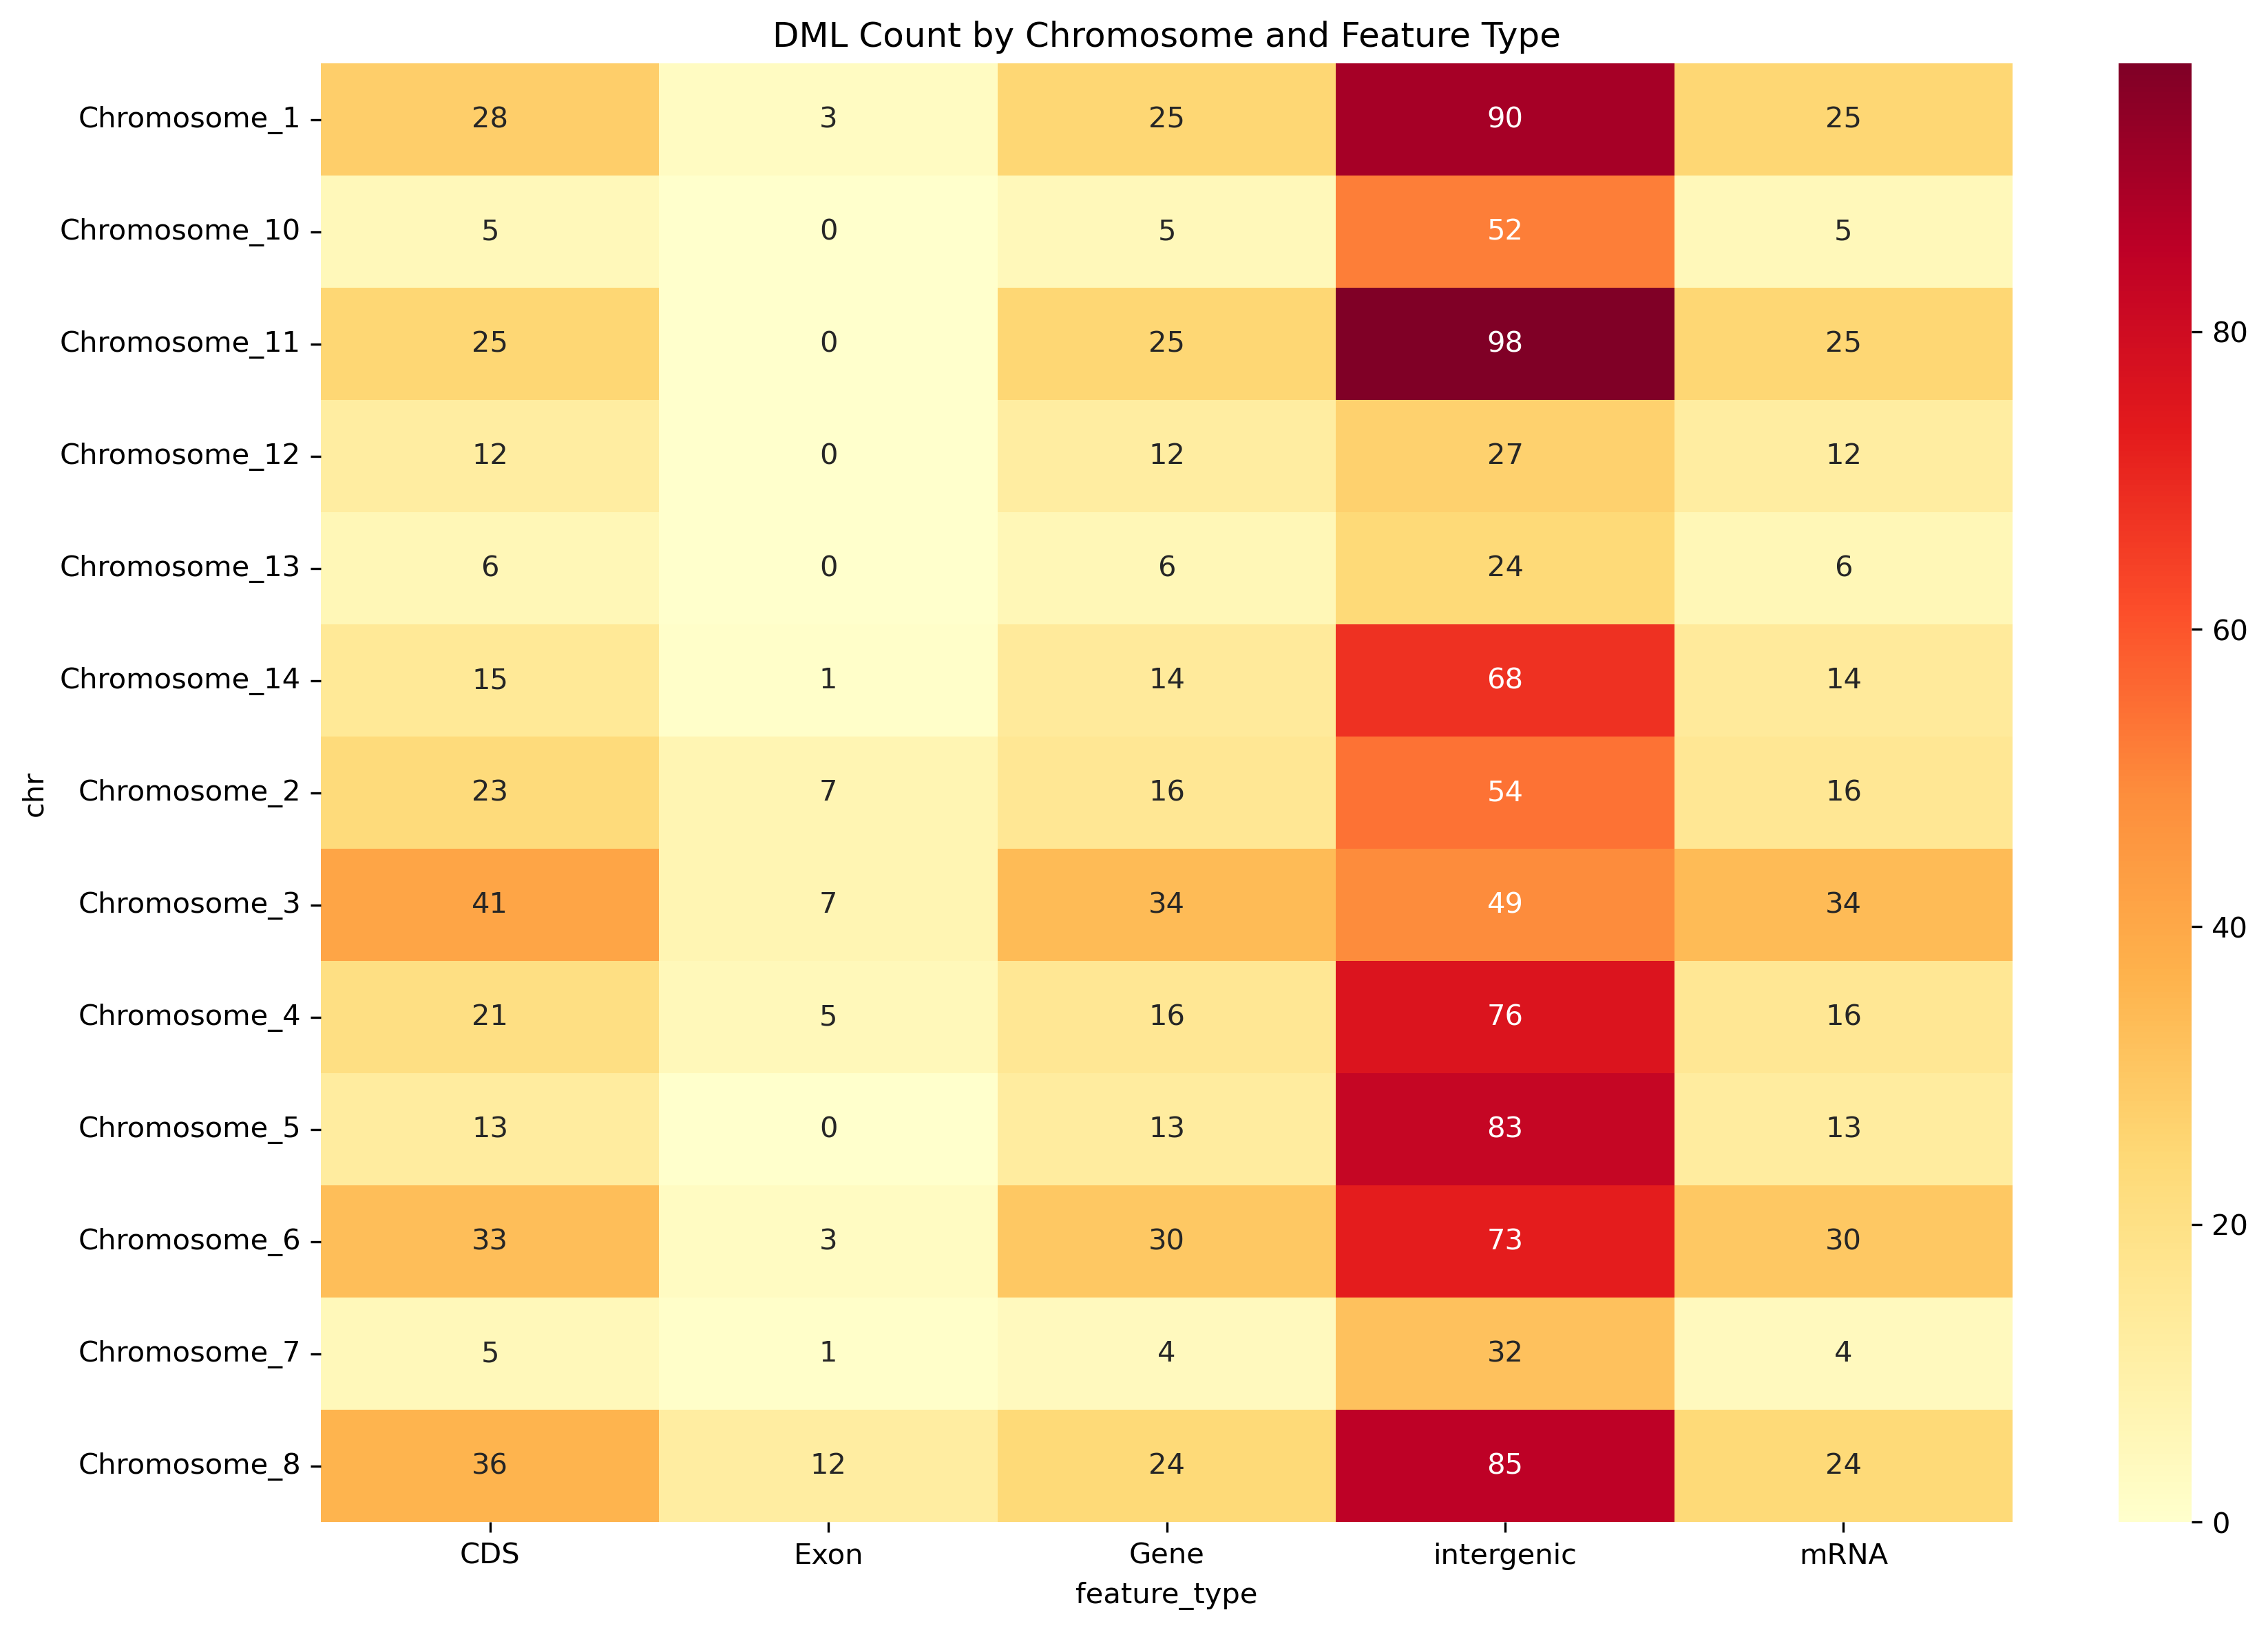
<figcaption aria-hidden="true">heatmap</figcaption>
</figure>

## Genes harboring DMLs and overall methylation pattern

We identified 159 genes containing differentially methylated loci (DMLs). For each gene, methylation differences were calculated by aggregating the absolute methylation change at all DMLs mapped to that gene, using the output from methylKit’s logistic regression analysis. Summary statistics (range: −77.04% to +66.86%; SD 40.48%, median: −8.96%, mean: −0.68%) were computed across these gene-level aggregated values, indicating a shift toward hypomethylation among DML-associated genes.

## Gene Ontology (GO): processes, functions, and locations

Across Biological Process terms, DML genes were most frequently annotated to metabolic process (71 genes; 44.7% of all DML genes) and to high-level developmental and cellular organization/biogenesis categories (each 57 genes; 35.8%). Additional frequent terms included nitrogen compound metabolic process (63 genes; 39.6%) and positive regulation of biological process (57 genes; 35.8%). For Molecular Function, broad binding categories predominated (binding: 81 genes, 50.9%; protein binding: 58 genes, 36.5%), consistent with an overrepresentation of regulatory and interaction-prone proteins. Cellular Component assignments placed many targets in cell/intracellular compartments (cell: 104 genes, 65.4%; intracellular: 99 genes, 62.3%), with frequent localization to the cytoplasm (80 genes, 50.3%) and nucleus (53 genes, 33.3%)

These patterns indicate that DMLs are concentrated in genes mediating metabolism, developmental programs, and cellular organization, with many targets residing in cytoplasmic and nuclear contexts where gene regulation and signal processing occur.

## KEGG pathways

DML-associated genes mapped to 122 unique KEGG pathways, with most pathways represented by a single gene, reflecting broad functional dispersion rather than concentration in a small number of routes. Prominent pathway classes included amino acid, carbohydrate, lipid, and nucleotide metabolism, as well as signal transduction and cellular process categories. The prevalence of core metabolic routes aligns with the GO-based enrichment of metabolic processes and suggests potential epigenetic modulation of energy balance and biosynthesis.

## Pfam domains

We detected 118 unique Pfam domains among DML-associated genes, generally with low redundancy (most domains present in one or two genes), underscoring protein family diversity. Recurrently observed domains included the RNA recognition motif (PF00076)—implicating post-transcriptional regulation—alongside regulatory/interaction modules such as BTB/POZ (PF07707) and ankyrin repeats (PF00023). We also observed immunoglobulin domains (PF00047) and cytochrome P450 families (PF00061/ PF00067), the latter consistent with roles in xenobiotic and lipid metabolism. Several domains of unknown function (DUFs) were present, indicating potentially novel or poorly characterized targets of methylation.

## Directionality of methylation changes

Given the negative median methylation difference, hypomethylation was more common among DML genes. Functionally, hypomethylated targets were enriched for regulatory proteins, signaling molecules, and transporters, whereas hypermethylated targets included transcription factors, metabolic enzymes, and structural proteins. Collectively, these patterns are consistent with widespread epigenetic remodeling across regulatory and metabolic layers, rather than changes confined to a single pathway or compartment.

## Summary

Together, these results show that genes harboring DMLs in Mytilus chilensis are functionally diverse. However, they converge on metabolism, development, and cellular organization, with many targets positioned in cytoplasmic and nuclear environments. The distribution of DMLs is skewed toward hypomethylation. DML-associated genes are dispersed across many KEGG pathways and contain regulatory or interaction-rich Pfam domains. These findings suggest a system-wide epigenetic response with potential consequences for metabolic control and developmental programming.

Castillo, N, L M Saavedra, C A Vargas, C Gallardo-Escárate, and C Détrée. 2017. “Ocean Acidification and Pathogen Exposure Modulate the Immune Response of the Edible Mussel \*Mytilus Chilensis\*.” *Fish & Shellfish Immunology* 70: 149–55. <https://doi.org/10.1016/j.fsi.2017.08.047>.

Montúfar-Romero, M, D Valenzuela-Miranda, V Valenzuela-Muñoz, M F Morales-Rivera, and C Gallardo-Escárate. 2025. “Microbiota Dysbiosis in \*Mytilus Chilensis\* Is Induced by Hypoxia, Leading to Molecular and Functional Consequences.” *Microorganisms* 13 (4): 825. <https://doi.org/10.3390/microorganisms13040825>.

Montúfar-Romero, M, V Valenzuela-Muñoz, D Valenzuela-Miranda, and C Gallardo-Escárate. 2024. “Hypoxia in the Blue Mussel \*Mytilus Chilensis\* Induces a Transcriptome Shift Associated with Endoplasmic Reticulum Stress, Metabolism, and Immune Response.” *Genes* 15 (6): 658. <https://doi.org/10.3390/genes15060658>.

Yévenes, M, G Gajardo, and C Gallardo-Escárate. 2025. “Decoding Local Adaptation in the Exploited Native Marine Mussel \*Mytilus Chilensis\*: Genomic Evidence from a Reciprocal Transplant Experiment.” *International Journal of Molecular Sciences* 26 (3): 931. <https://doi.org/10.3390/ijms26030931>.

Yévenes, M, C Gallardo-Escárate, and G Gajardo. 2023. “Epigenetic Variation Mediated by lncRNAs Accounts for Adaptive Genomic Differentiation of the Endemic Blue Mussel \*Mytilus Chilensis\*.” *Heliyon* 10 (1): e23695. <https://doi.org/10.1016/j.heliyon.2023.e23695>.

Yévenes, M, G Núñez-Acuña, C Gallardo-Escárate, and G Gajardo. 2021. “Adaptive Differences in Gene Expression in Farm-Impacted Seedbeds of the Native Blue Mussel \*Mytilus Chilensis\*.” *Frontiers in Genetics* 12: 666539. <https://doi.org/10.3389/fgene.2021.666539>.

———. 2022. “Adaptive Mitochondrial Genome Functioning in Ecologically Different Farm-Impacted Natural Seedbeds of the Endemic Blue Mussel \*Mytilus Chilensis\*.” *Comparative Biochemistry and Physiology Part D: Genomics and Proteomics* 42: 100955. <https://doi.org/10.1016/j.cbd.2021.100955>.